<a href="https://colab.research.google.com/github/anamiqbal95/Credit_Card_Churn_Prediction/blob/main/Credit_Card_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning

In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [3]:
data = pd.read_csv('BankChurners.csv')
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

**Removing variables not required**

In [5]:
new_data = data.iloc[:, :-2]
new_data = new_data.iloc[:, 1:]

In [6]:
new_data.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

**Exploring statistics for the data such as mean, standard deviation, etc.**





In [7]:
new_data.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


**Checking for null values in all columns**

In [8]:
new_data.isna().sum() 

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

# Exploratory Data Analysis

**Checking the value counts**

In [9]:
new_data['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [10]:
new_data['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [11]:
new_data['Credit_Limit'].value_counts()

34516.0    508
1438.3     507
9959.0      18
15987.0     18
23981.0     12
          ... 
9183.0       1
29923.0      1
9551.0       1
11558.0      1
10388.0      1
Name: Credit_Limit, Length: 6205, dtype: int64

**Plots to check distribution of various columns**

array([[<AxesSubplot:title={'center':'Customer_Age'}>]], dtype=object)

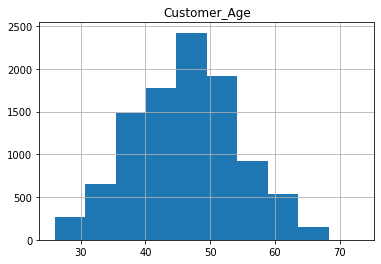

In [12]:
new_data.hist(column='Customer_Age')

array([[<AxesSubplot:title={'center':'Credit_Limit'}>]], dtype=object)

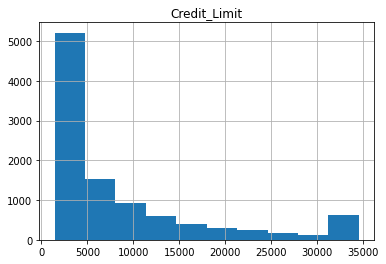

In [13]:
new_data.hist(column='Credit_Limit')

array([[<AxesSubplot:title={'center':'Dependent_count'}>]], dtype=object)

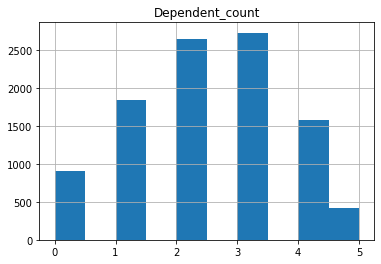

In [14]:
new_data.hist(column='Dependent_count')

In [15]:
fig = px.histogram(new_data, x="Customer_Age")
fig.show()

In [16]:
fig = px.box(new_data, x="Customer_Age", y="Attrition_Flag")
 
fig.show()

In [17]:
fig = px.box(new_data, x="Customer_Age")
 
fig.show()

In [18]:
fig = px.box(new_data, x="Dependent_count")
 
fig.show()

In [19]:
#corr_df = new_data['Gender'].corr(new_data['Income_Category'])
CrosstabResult=pd.crosstab(index=new_data['Gender'],columns=new_data['Income_Category'])
print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 

Income_Category  $120K +  $40K - $60K  ...  Less than $40K  Unknown
Gender                                 ...                         
F                      0         1014  ...            3284     1060
M                    727          776  ...             277       52

[2 rows x 6 columns]


In [20]:
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=new_data['Customer_Age'],name='Customer Age Box Plot',boxmean=True)
tr2=go.Histogram(x=new_data['Customer_Age'],name='Customer Age Histogram')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=1200, title_text="Distribution of Customer Ages")
fig.show()

In [21]:
fig = px.pie(new_data, names = "Gender")
fig.show()

In [22]:
fig = px.pie(new_data, names = "Education_Level", title = 'Educational Level')
fig.show()

In [23]:
fig = px.pie(new_data, names = "Card_Category")
fig.show()

In [24]:
!pip install dython

**Plotting the correlation matrix:**



The below correlation matrix shows us the correlation and collinearity between 
all variables and highlights the need to remove certain variables as they are highly correlated with one another and will bring a problem of overfitting if not removed. For example, Credit limit is positively correlated with average open to buy. 

<AxesSubplot:xlabel='Gender'>

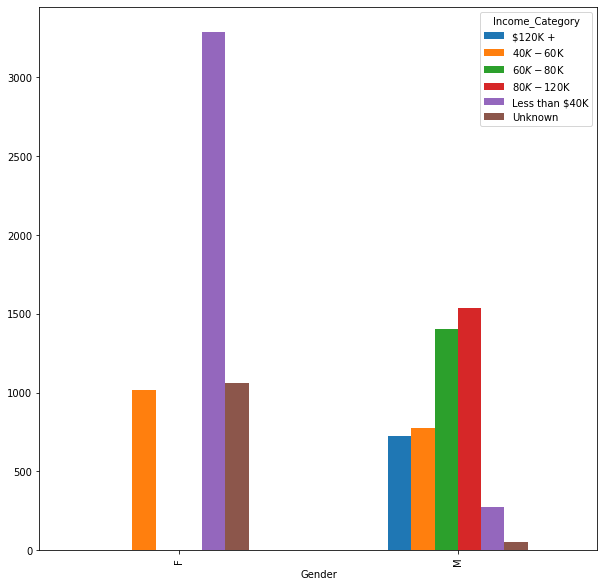

In [25]:
pd.crosstab(new_data['Gender'], new_data['Income_Category']).plot(kind='bar',figsize=(10,10))

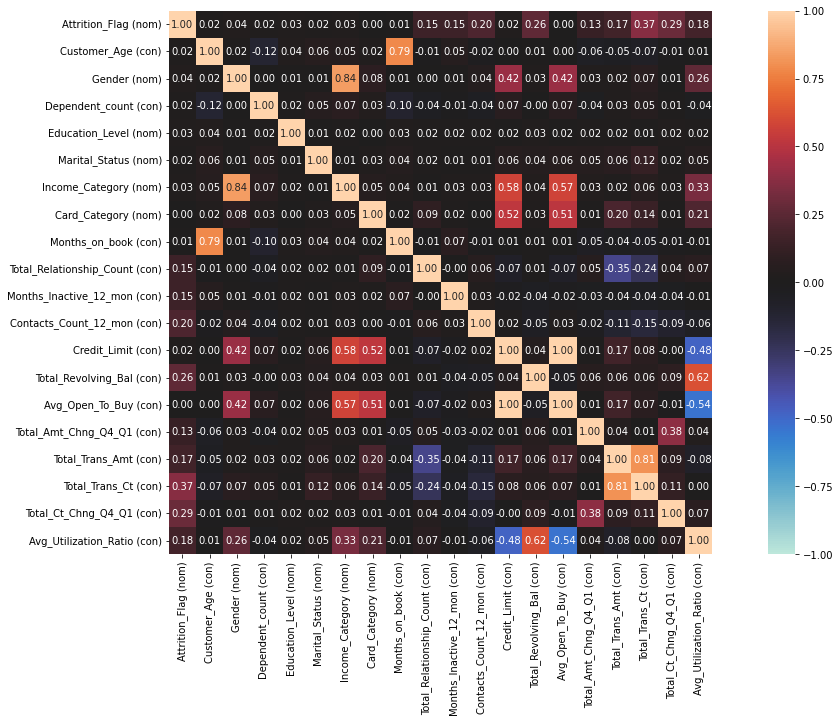

In [26]:
from dython import nominal
nominal.associations(new_data[['Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']],figsize=(20,10),mark_columns=True);

# Feature Engineering

**Label Encoding:**

First step is to convert string categorical data/columns into numerical data to 
be used in ML algorithms. The following are converted for this data set:
Gender, Education Level, Marital Status, Income Category, Card Category and Attrition Flag.


In [27]:
new_data['Gender'] = new_data['Gender'].astype('category')
# Assigning numerical values and storing in another column
new_data['Gender_Cat'] = new_data['Gender'].cat.codes

In [28]:
new_data[['Gender','Gender_Cat']]

,Gender,Gender_Cat
0,M,1
1,F,0
2,M,1
3,F,0
4,M,1
...,...,...
10122,M,1
10123,M,1
10124,F,0
10125,M,1


In [29]:
new_data['Education_Level'] = new_data['Education_Level'].astype('category')
# Assigning numerical values and storing in another column
new_data['Education_Level_Cat'] = new_data['Education_Level'].cat.codes

In [30]:
new_data[['Education_Level','Education_Level_Cat']]

,Education_Level,Education_Level_Cat
0,High School,3
1,Graduate,2
2,Graduate,2
3,High School,3
4,Uneducated,5
...,...,...
10122,Graduate,2
10123,Unknown,6
10124,High School,3
10125,Graduate,2


In [31]:
new_data['Marital_Status'] = new_data['Marital_Status'].astype('category')
# Assigning numerical values and storing in another column
new_data['Marital_Status_Cat'] = new_data['Marital_Status'].cat.codes

In [32]:
new_data[['Marital_Status','Marital_Status_Cat']]

,Marital_Status,Marital_Status_Cat
0,Married,1
1,Single,2
2,Married,1
3,Unknown,3
4,Married,1
...,...,...
10122,Single,2
10123,Divorced,0
10124,Married,1
10125,Unknown,3


In [33]:
new_data['Income_Category'] = new_data['Income_Category'].astype('category')
# Assigning numerical values and storing in another column
new_data['Income_Category_Cat'] = new_data['Income_Category'].cat.codes

In [34]:
new_data[['Income_Category','Income_Category_Cat']]

,Income_Category,Income_Category_Cat
0,$60K - $80K,2
1,Less than $40K,4
2,$80K - $120K,3
3,Less than $40K,4
4,$60K - $80K,2
...,...,...
10122,$40K - $60K,1
10123,$40K - $60K,1
10124,Less than $40K,4
10125,$40K - $60K,1


In [35]:
new_data['Card_Category'] = new_data['Card_Category'].astype('category')
# Assigning numerical values and storing in another column
new_data['Card_Category_Cat'] = new_data['Card_Category'].cat.codes

In [36]:
new_data[['Card_Category','Card_Category_Cat']]

,Card_Category,Card_Category_Cat
0,Blue,0
1,Blue,0
2,Blue,0
3,Blue,0
4,Blue,0
...,...,...
10122,Blue,0
10123,Blue,0
10124,Blue,0
10125,Blue,0


In [37]:
new_data['Attrition_Flag'] = new_data['Attrition_Flag'].astype('category')
# Assigning numerical values and storing in another column
new_data['Attrition_Flag_Cat'] = new_data['Attrition_Flag'].cat.codes
def invert_labels(x):
  if x==0:
    return 1
  else:
    return 0
new_data['Attrition_Flag_Cat'] = new_data['Attrition_Flag_Cat'].map(invert_labels)

In [38]:
new_data[['Attrition_Flag','Attrition_Flag_Cat']]

,Attrition_Flag,Attrition_Flag_Cat
0,Existing Customer,0
1,Existing Customer,0
2,Existing Customer,0
3,Existing Customer,0
4,Existing Customer,0
...,...,...
10122,Existing Customer,0
10123,Attrited Customer,1
10124,Attrited Customer,1
10125,Attrited Customer,1


In [39]:
features_df = new_data[['Attrition_Flag_Cat', 'Customer_Age', 'Gender_Cat', 'Dependent_count',
       'Education_Level_Cat', 'Marital_Status_Cat', 'Income_Category_Cat', 'Card_Category_Cat',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]

**Randomizing the data below to avoid any bias in training**

In [40]:
features_df = features_df.sample(frac = 1, random_state = 42)

In [41]:
features_df

,Attrition_Flag_Cat,Customer_Age,Gender_Cat,Dependent_count,Education_Level_Cat,Marital_Status_Cat,Income_Category_Cat,Card_Category_Cat,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
3781,0,48,0,3,5,2,4,0,39,4,3,4,2991.0,1508,0.703,3734,64,0.882,0.504
2922,0,59,1,1,5,2,4,0,53,5,5,4,2192.0,1569,0.706,4010,79,0.717,0.716
5070,0,37,0,2,2,0,4,0,36,4,3,3,1734.0,987,0.879,4727,67,0.914,0.569
7246,0,47,1,3,1,0,1,0,36,4,2,3,4786.0,1516,0.940,4973,74,0.850,0.317
623,0,42,1,3,6,2,3,0,33,3,3,2,3714.0,2170,0.524,1454,35,0.522,0.584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1,44,0,1,2,2,1,0,38,3,2,5,4142.0,2517,0.809,2104,44,0.833,0.608
5191,1,53,0,3,3,0,5,0,36,4,3,6,7939.0,0,0.551,2269,42,0.312,0.000
5390,0,42,0,4,2,3,4,0,32,3,1,2,2314.0,1547,0.804,4678,74,1.000,0.669
860,0,40,1,3,6,2,1,0,28,4,1,1,3563.0,1707,0.506,1482,42,0.312,0.479


**Splitting data into features and output columns for train/test split**

In [42]:
## separating data into input(all columns - attrition) and output(attrition)
X = features_df.iloc[:, 1:]
y = features_df.iloc[:, 0]

In [43]:
y

3781    0
2922    0
5070    0
7246    0
623     0
       ..
5734    1
5191    1
5390    0
860     0
7270    0
Name: Attrition_Flag_Cat, Length: 10127, dtype: int64

In [44]:
X

,Customer_Age,Gender_Cat,Dependent_count,Education_Level_Cat,Marital_Status_Cat,Income_Category_Cat,Card_Category_Cat,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
3781,48,0,3,5,2,4,0,39,4,3,4,2991.0,1508,0.703,3734,64,0.882,0.504
2922,59,1,1,5,2,4,0,53,5,5,4,2192.0,1569,0.706,4010,79,0.717,0.716
5070,37,0,2,2,0,4,0,36,4,3,3,1734.0,987,0.879,4727,67,0.914,0.569
7246,47,1,3,1,0,1,0,36,4,2,3,4786.0,1516,0.940,4973,74,0.850,0.317
623,42,1,3,6,2,3,0,33,3,3,2,3714.0,2170,0.524,1454,35,0.522,0.584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,44,0,1,2,2,1,0,38,3,2,5,4142.0,2517,0.809,2104,44,0.833,0.608
5191,53,0,3,3,0,5,0,36,4,3,6,7939.0,0,0.551,2269,42,0.312,0.000
5390,42,0,4,2,3,4,0,32,3,1,2,2314.0,1547,0.804,4678,74,1.000,0.669
860,40,1,3,6,2,1,0,28,4,1,1,3563.0,1707,0.506,1482,42,0.312,0.479


**Splitting data into train and test sets:**

In [45]:
## creating train and test data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


# Applying ML Algorithms

**ITERATION 1:**

**Applying ML Algorithms: Logistic Regression, SVM, XGBoost**

**1 - Logistic Regression:**

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
model_LR = LogisticRegression(solver='liblinear', random_state=0)

In [48]:
model_LR.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [49]:
model_LR.classes_

array([0, 1])

In [50]:
model_LR.intercept_

array([0.15757799])

In [51]:
model_LR.coef_

array([[ 1.99732921e-02, -2.64639590e-01,  1.72824539e-01,
         4.42589822e-02,  4.10944102e-01,  6.12609134e-02,
         1.16243616e-01, -7.90709200e-03, -3.72358924e-01,
         6.33177923e-01,  7.27610980e-01, -6.24436979e-06,
        -9.27409205e-04, -1.81668105e-01,  4.21231074e-04,
        -1.07279822e-01, -6.01056638e-01,  2.56759383e-02]])

In [52]:
model_LR.predict_proba(X_test)

array([[0.19008593, 0.80991407],
       [0.88633855, 0.11366145],
       [0.98603742, 0.01396258],
       ...,
       [0.98293764, 0.01706236],
       [0.8791151 , 0.1208849 ],
       [0.82393473, 0.17606527]])

In [53]:
y_predict = model_LR.predict(X_test)

In [54]:
model_LR.score(X_test, y_test)

0.8899308983218164

In [55]:
confusion_matrix(y_test, model_LR.predict(X_test))

array([[1630,   61],
       [ 162,  173]])

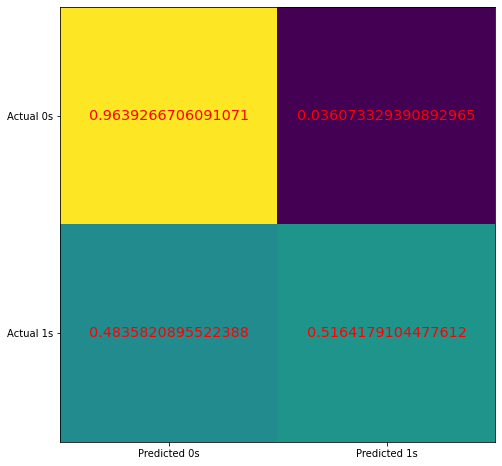

In [56]:
cm = confusion_matrix(y_test, model_LR.predict(X_test),normalize='true')

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red', fontsize = 'x-large')
plt.show()

In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      1792
           1       0.52      0.74      0.61       234

    accuracy                           0.89      2026
   macro avg       0.74      0.82      0.77      2026
weighted avg       0.91      0.89      0.90      2026



**2 - SVM:**

In [59]:
from sklearn.svm import SVC

In [60]:
clf = SVC (gamma = 'auto')

In [61]:
clf.fit(X_train, y_train)

SVC(gamma='auto')

In [62]:
svm_y_predict = clf.predict(X_test)
print(svm_y_predict)

[0 0 0 ... 0 0 0]


In [63]:
clf.score(X_test, y_test)

0.8346495557749259

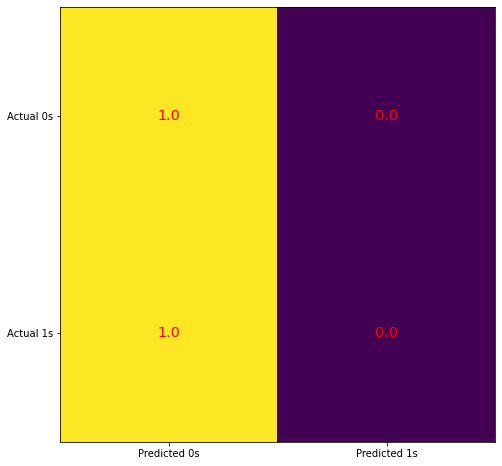

In [64]:
cm = confusion_matrix(y_test, svm_y_predict,normalize='true' )

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red', fontsize = 'x-large')
plt.show()

In [65]:
print(classification_report(svm_y_predict, y_test))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91      2026
           1       0.00      0.00      0.00         0

    accuracy                           0.83      2026
   macro avg       0.50      0.42      0.45      2026
weighted avg       1.00      0.83      0.91      2026



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [66]:
list(set(svm_y_predict))

[0]

**3 - XGBoost:**

In [67]:
import xgboost as xgb

In [68]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

xgb_model.fit(X_train, y_train)

XGBClassifier(random_state=42)

In [69]:
y_pred_xgb = xgb_model.predict(X_test)

In [70]:
y_pred_xgb

array([1, 0, 0, ..., 0, 0, 1])

In [71]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1691
           1       0.96      0.84      0.89       335

    accuracy                           0.97      2026
   macro avg       0.96      0.92      0.94      2026
weighted avg       0.97      0.97      0.97      2026



<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

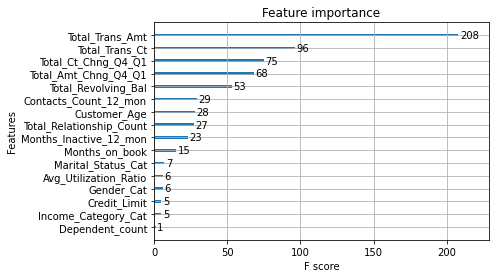

In [72]:
##Saw feature importance through XGBoost too
xgb.plot_importance(xgb_model)

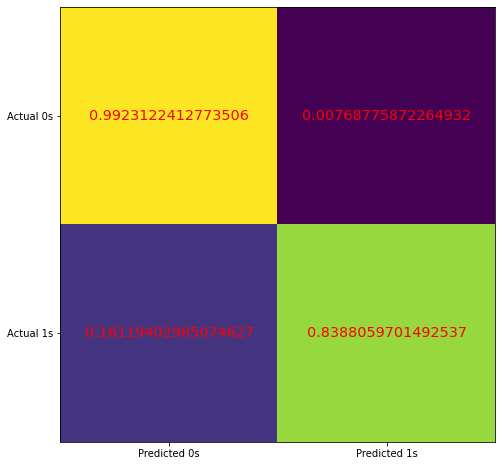

In [73]:
cm = confusion_matrix(y_test, y_pred_xgb,normalize='true')

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red', fontsize = 'x-large')
plt.show()

**ITERATION 2:**

**Made two major changes:**

**1.   dealt with imbalanced data by down sampling**

**2.   removed highly correlated columns such as average open to buy**

In [74]:
#neg label is for existing customers
neg_label_rows = features_df[features_df['Attrition_Flag_Cat'] == 0]
pos_label_rows = features_df[features_df['Attrition_Flag_Cat'] == 1]

In [75]:
neg_label_rows

,Attrition_Flag_Cat,Customer_Age,Gender_Cat,Dependent_count,Education_Level_Cat,Marital_Status_Cat,Income_Category_Cat,Card_Category_Cat,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
3781,0,48,0,3,5,2,4,0,39,4,3,4,2991.0,1508,0.703,3734,64,0.882,0.504
2922,0,59,1,1,5,2,4,0,53,5,5,4,2192.0,1569,0.706,4010,79,0.717,0.716
5070,0,37,0,2,2,0,4,0,36,4,3,3,1734.0,987,0.879,4727,67,0.914,0.569
7246,0,47,1,3,1,0,1,0,36,4,2,3,4786.0,1516,0.940,4973,74,0.850,0.317
623,0,42,1,3,6,2,3,0,33,3,3,2,3714.0,2170,0.524,1454,35,0.522,0.584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0,40,1,2,3,1,0,0,27,5,3,1,12248.0,1323,0.882,4806,91,0.896,0.108
466,0,63,1,2,2,1,2,0,49,5,2,3,14035.0,2061,2.271,1606,30,1.500,0.147
5390,0,42,0,4,2,3,4,0,32,3,1,2,2314.0,1547,0.804,4678,74,1.000,0.669
860,0,40,1,3,6,2,1,0,28,4,1,1,3563.0,1707,0.506,1482,42,0.312,0.479


In [76]:
pos_label_rows

,Attrition_Flag_Cat,Customer_Age,Gender_Cat,Dependent_count,Education_Level_Cat,Marital_Status_Cat,Income_Category_Cat,Card_Category_Cat,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
3994,1,48,1,4,0,1,3,0,32,5,2,3,25190.0,0,0.467,1533,41,0.323,0.000
5137,1,46,0,3,3,1,4,0,39,3,3,0,1801.0,316,0.494,2252,42,0.400,0.175
4540,1,39,0,1,2,2,4,0,26,3,3,1,1876.0,1536,0.712,2579,47,0.469,0.819
5933,1,50,0,1,2,2,4,0,36,1,3,4,2422.0,502,0.997,2548,46,0.484,0.207
7111,1,43,1,3,0,1,2,0,36,2,3,3,1438.3,0,0.539,1707,38,1.111,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6396,1,55,0,2,0,0,1,0,36,6,2,3,4410.0,2517,0.530,1883,44,0.630,0.571
6420,1,48,0,4,6,1,4,0,36,4,3,3,2740.0,2425,0.816,2431,46,0.394,0.885
6265,1,50,0,3,3,1,4,0,36,2,3,3,1572.0,0,0.740,2447,41,0.577,0.000
5734,1,44,0,1,2,2,1,0,38,3,2,5,4142.0,2517,0.809,2104,44,0.833,0.608


In [77]:
features_df = pd.concat([pos_label_rows, neg_label_rows[0:2000]])

In [78]:
features_df

,Attrition_Flag_Cat,Customer_Age,Gender_Cat,Dependent_count,Education_Level_Cat,Marital_Status_Cat,Income_Category_Cat,Card_Category_Cat,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
3994,1,48,1,4,0,1,3,0,32,5,2,3,25190.0,0,0.467,1533,41,0.323,0.000
5137,1,46,0,3,3,1,4,0,39,3,3,0,1801.0,316,0.494,2252,42,0.400,0.175
4540,1,39,0,1,2,2,4,0,26,3,3,1,1876.0,1536,0.712,2579,47,0.469,0.819
5933,1,50,0,1,2,2,4,0,36,1,3,4,2422.0,502,0.997,2548,46,0.484,0.207
7111,1,43,1,3,0,1,2,0,36,2,3,3,1438.3,0,0.539,1707,38,1.111,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5344,0,48,0,3,3,1,4,0,34,5,2,2,1495.0,0,0.802,3878,63,0.703,0.000
9124,0,52,0,1,2,2,4,0,36,1,3,3,6616.0,831,0.707,9065,85,0.735,0.126
9722,0,48,0,2,6,2,4,0,37,3,3,2,3594.0,1996,0.795,14881,109,0.703,0.555
4509,0,34,0,0,2,1,5,0,13,4,1,4,7942.0,2087,0.754,4068,66,0.610,0.263


In [79]:
## new train test
## separating data into input(all columns - attrition) and output(attrition)
X = features_df.iloc[:, 1:]
y = features_df.iloc[:, 0]


In [80]:
y

3994    1
5137    1
4540    1
5933    1
7111    1
       ..
5344    0
9124    0
9722    0
4509    0
675     0
Name: Attrition_Flag_Cat, Length: 3627, dtype: int64

In [81]:
X

,Customer_Age,Gender_Cat,Dependent_count,Education_Level_Cat,Marital_Status_Cat,Income_Category_Cat,Card_Category_Cat,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
3994,48,1,4,0,1,3,0,32,5,2,3,25190.0,0,0.467,1533,41,0.323,0.000
5137,46,0,3,3,1,4,0,39,3,3,0,1801.0,316,0.494,2252,42,0.400,0.175
4540,39,0,1,2,2,4,0,26,3,3,1,1876.0,1536,0.712,2579,47,0.469,0.819
5933,50,0,1,2,2,4,0,36,1,3,4,2422.0,502,0.997,2548,46,0.484,0.207
7111,43,1,3,0,1,2,0,36,2,3,3,1438.3,0,0.539,1707,38,1.111,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5344,48,0,3,3,1,4,0,34,5,2,2,1495.0,0,0.802,3878,63,0.703,0.000
9124,52,0,1,2,2,4,0,36,1,3,3,6616.0,831,0.707,9065,85,0.735,0.126
9722,48,0,2,6,2,4,0,37,3,3,2,3594.0,1996,0.795,14881,109,0.703,0.555
4509,34,0,0,2,1,5,0,13,4,1,4,7942.0,2087,0.754,4068,66,0.610,0.263


In [82]:
## creating train and test data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [83]:
import xgboost as xgb

In [84]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

xgb_model.fit(X_train, y_train)

XGBClassifier(random_state=42)

In [85]:
y_pred_xgb = xgb_model.predict(X_test)

In [86]:
y_pred_xgb

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,

In [87]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       382
           1       0.94      0.93      0.93       344

    accuracy                           0.94       726
   macro avg       0.94      0.94      0.94       726
weighted avg       0.94      0.94      0.94       726



<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

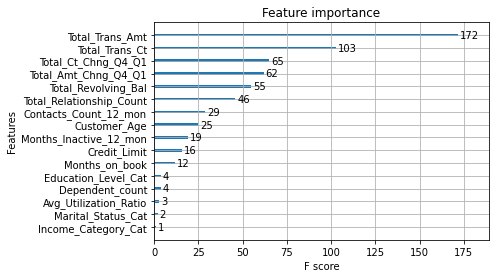

In [88]:
xgb.plot_importance(xgb_model)

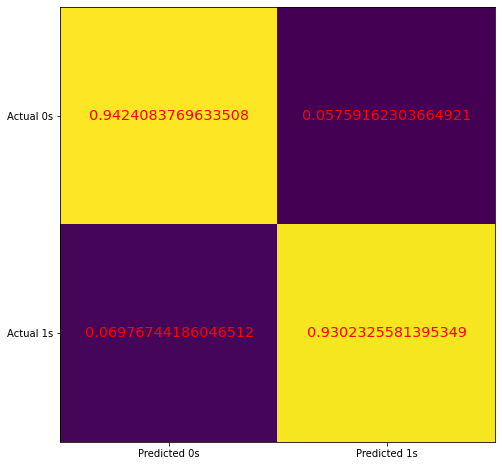

In [89]:
cm = confusion_matrix(y_test, y_pred_xgb,normalize='true')

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red', fontsize = 'x-large')
plt.show()

**From the 1st iteration to the 2nd interation, our f1 score for label 1 increased from 89% to 93%. This model will help businesses take preventive measures to avoid customers from churning.**